In [5]:
# Load dependencies

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
# Load data from the csv file

datadf = pd.read_csv("Dataset/fraud_data.csv")

# Descriptive statistics of the data
print(datadf.describe())

# Describe the data
print(datadf.info())

                amt           lat          long      city_pop     merch_lat  \
count  14446.000000  14446.000000  14446.000000  1.444600e+04  14446.000000   
mean     124.430073     39.787692   -110.874225  1.065370e+05     39.787991   
std      231.352587      5.317039     12.985813  2.902916e+05      5.360593   
min        1.000000     20.027100   -165.672300  4.600000e+01     19.032689   
25%       12.080000     36.715400   -120.415800  4.930000e+02     36.794655   
50%       51.520000     39.666200   -111.098500  1.645000e+03     39.620953   
75%      101.030000     41.940400   -101.136000  3.543900e+04     42.275740   
max     3261.470000     66.693300    -89.628700  2.383912e+06     67.510267   

         merch_long  
count  14446.000000  
mean    -110.874892  
std       12.995596  
min     -166.670685  
25%     -120.146253  
50%     -111.192629  
75%     -100.446822  
max      -88.646366  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (

In [7]:
# Convert 'trans_date_trans_time' column to datetime type
datadf['trans_date_trans_time'] = pd.to_datetime(datadf['trans_date_trans_time'], format='%d-%m-%Y %H:%M')

# Extract date components from 'trans_date_trans_time'
datadf['trans_year'] = datadf['trans_date_trans_time'].dt.year
datadf['trans_month'] = datadf['trans_date_trans_time'].dt.month
datadf['trans_day'] = datadf['trans_date_trans_time'].dt.day
datadf['trans_hour'] = datadf['trans_date_trans_time'].dt.hour
datadf['trans_minute'] = datadf['trans_date_trans_time'].dt.minute
datadf['trans_second'] = datadf['trans_date_trans_time'].dt.second

# Convert 'dob' column to datetime type 
datadf['dob'] = pd.to_datetime(datadf['dob'], format='%d-%m-%Y')

# Extract year from 'dob'
datadf['dob_year'] = datadf['dob'].dt.year


# Drop unwanted rows and clean up formatting
datadf = datadf[(datadf['is_fraud'] == "0") | (datadf['is_fraud'] == "1")]
datadf.dropna()
datadf = datadf[datadf["amt"]<=1500]
datadf['merchant'] = datadf['merchant'].str.replace('"', '')
datadf['job'] = datadf['job'].str.replace('"', '')

# Update the datadf['is_fraud] to datatype int
datadf['is_fraud'] = datadf['is_fraud'].astype(int)

# Create sub-dataframes and print confines of dataset
datadf #complete and cleaned dataframe
# frauddf = datadf[datadf["is_fraud"]=="1"] #dataframe of all fradulent data (best for after all columns are added)
#truedf = datadf[datadf["is_fraud"]=="0"] #dataframe of all clean data (best for after all columns are added)

# Print the number of transactions in the dataset
print(f'The dataset contains {len(datadf)} transactions.')
# Print the time period of the dataset
print(f'The dataset transactions begin on {datadf["trans_date_trans_time"].min()}.')
print(f'The dataset transactions end on {datadf["trans_date_trans_time"].max()}.')
# Print the number of fraudulent transactions in the dataset
print(f'The dataset contains {len(datadf[datadf["is_fraud"]==1])} fraudulent transactions.')

# Convert [is_fraud] back to str 
datadf['is_fraud'] = datadf['is_fraud'].astype(str)

The dataset contains 14435 transactions.
The dataset transactions begin on 2019-01-01 00:00:00.
The dataset transactions end on 2020-12-31 23:59:00.
The dataset contains 1844 fraudulent transactions.


In [8]:
# Print the transactions sorting from maximum to minimum amount
# Print the top 20 transactions
datadf.head(10).sort_values(by='amt', ascending=False)

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,...,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_day,trans_hour,trans_minute,trans_second,dob_year
1,2019-01-04 15:06:00,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,65.468863,-165.473127,1,2019,1,4,15,6,0,1939
9,2019-01-05 22:02:00,Dooley-Thompson,misc_net,849.49,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,65.266065,-164.865352,1,2019,1,5,22,2,0,1939
8,2019-01-05 18:03:00,McGlynn-Heathcote,misc_net,768.15,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,64.623325,-166.403973,1,2019,1,5,18,3,0,1939
7,2019-01-05 11:31:00,Padberg-Welch,grocery_pos,367.29,Browning,MO,40.0290,-93.1607,602,Cytogeneticist,...,39.167065,-93.705245,1,2019,1,5,11,31,0,1954
3,2019-01-04 23:06:00,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,64.445035,-166.080207,1,2019,1,4,23,6,0,1939
2,2019-01-04 22:37:00,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,65.347667,-165.914542,1,2019,1,4,22,37,0,1939
5,2019-01-05 03:15:00,"Raynor, Reinger and Hagenes",gas_transport,20.45,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,64.088838,-165.104078,1,2019,1,5,3,15,0,1939
6,2019-01-05 03:21:00,Heller-Langosh,gas_transport,18.19,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,63.917785,-165.827621,1,2019,1,5,3,21,0,1939
4,2019-01-04 23:59:00,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,65.447094,-165.446843,1,2019,1,4,23,59,0,1939
0,2019-01-04 00:58:00,"Stokes, Christiansen and Sipes",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,65.654142,-164.722603,1,2019,1,4,0,58,0,1939


### Task 4: Analyze Merchants and Categories with Higher Fraud Incidence (Joseph & Micah)

- Identify which categories have the highest rates of fraud by calculating fraud incidence for each. 

- Top 10 Merchant and show fraud amounts. 

- **Bar Chart:** Create bar charts to display the fraud rate for each category. This can help highlight which categories have highest fraud amounts.

- **Bar Chart:** Create bar charts to display the fraud rate for each state. This can help highlight which states have higher fraud amounts.


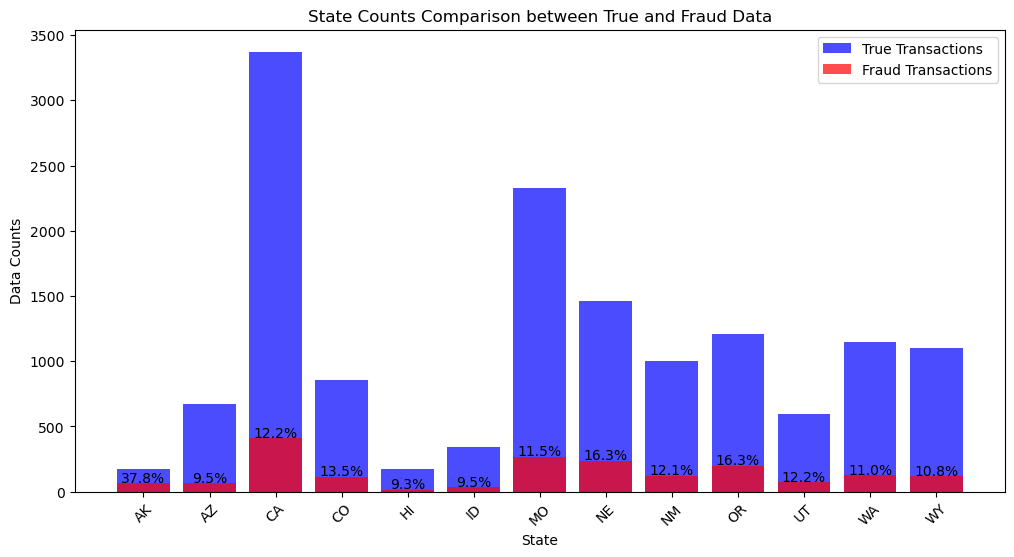

In [9]:
frauddf = datadf[datadf["is_fraud"]=="1"] #dataframe of all fradulent data (best for after all columns are added)
truedf = datadf[datadf["is_fraud"]=="0"] #dataframe of all clean data (best for after all columns are added)

# Category counts for true, fraud, and total counts
fraudstate = frauddf["state"].value_counts().reset_index().rename(columns={'index': 'state'})
truestate = truedf["state"].value_counts().reset_index().rename(columns={'index': 'state'})
totalstate = datadf["state"].value_counts().reset_index().rename(columns={'index': 'state'})

# Merge data
statecount = pd.merge(totalstate, truestate, on="state", how='outer')
statecount = pd.merge(statecount, fraudstate, on="state", how='outer')
statecount.columns = ['state', 'total_count' , 'true_count', 'fraud_count']

# Percentage of fraud data compared to total data
statecount['fraud_percentage'] = (statecount['fraud_count'] / statecount['total_count']) * 100

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(statecount['state'], statecount['total_count'], color='b', alpha=0.7, label='True Transactions')
plt.bar(statecount['state'], statecount['fraud_count'], color='r', alpha=0.7, label='Fraud Transactions')
plt.xlabel('State')
plt.ylabel('Data Counts')
plt.title('State Counts Comparison between True and Fraud Data')
plt.legend()

# Display percentage information on the plot
for i, row in statecount.iterrows():
    plt.text(i, row['fraud_count'] + 10, f"{row['fraud_percentage']:.1f}%", ha='center')

plt.xticks(rotation=45)
# plt.savefig("Visualizations/State Counts Comparison .png")
plt.show()

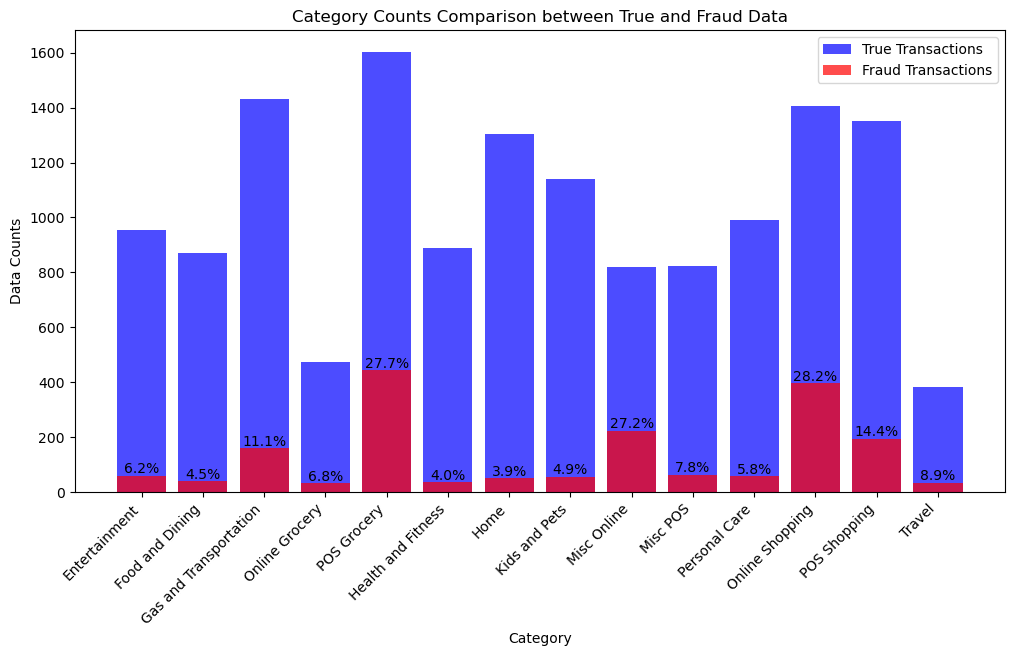

In [10]:
# Category counts for true, fraud, and total counts
totalcat = datadf["category"].value_counts().reset_index().rename(columns={'index': 'category'})
truecat = truedf["category"].value_counts().reset_index().rename(columns={'index': 'category'})
fraudcat = frauddf["category"].value_counts().reset_index().rename(columns={'index': 'category'})

# Merge data
catcount = pd.merge(totalcat, truecat, on="category", how='outer')
catcount = pd.merge(catcount, fraudcat, on="category", how='outer')
catcount.columns = ['category', 'total_count' , 'true_count', 'fraud_count']
catrename = {'entertainment': "Entertainment", 
        'food_dining':"Food and Dining", 
        'gas_transport': "Gas and Transportation", 
        'grocery_net': "Online Grocery",
        'grocery_pos': "POS Grocery", 
        'health_fitness': "Health and Fitness", 
        'home': "Home", 
        'kids_pets': "Kids and Pets", 
        'misc_net':"Misc Online",
        'misc_pos': "Misc POS", 
        'personal_care': "Personal Care", 
        'shopping_net' :"Online Shopping", 
        'shopping_pos':"POS Shopping",
        'travel':"Travel"}
catcount['category'] = catcount['category'].replace(catrename)

# Percentage of fraud data compared to total data
catcount['fraud_percentage'] = (catcount['fraud_count'] / catcount['total_count']) * 100

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(catcount['category'], catcount['total_count'], color='b', alpha=0.7, label='True Transactions')
plt.bar(catcount['category'], catcount['fraud_count'], color='r', alpha=0.7, label='Fraud Transactions')
plt.xlabel('Category')
plt.ylabel('Data Counts')
plt.title('Category Counts Comparison between True and Fraud Data')
plt.legend()

# Display percentage information on the plot
for i, row in catcount.iterrows():
    plt.text(i, row['fraud_count'] + 10, f"{row['fraud_percentage']:.1f}%", ha='center')

plt.xticks(rotation=45, ha='right')
# plt.savefig("Visualizations/Category Counts Comparison .png")
plt.show()

# get column total of datafr[amt]
total_amt = datadf['amt'].sum()

### Task 5: Analyze Relationship Between Transaction Amount and Fraud Likelihood (Sergei)

- **Assigned to Person E:**
  - Analyze the distribution of transaction amounts for fraudulent versus non-fraudulent transactions.
  - Use statistical tests or visualizations to explore any relationships between transaction amount and the likelihood of fraud.

- **Scatter Plot** plot age grouping and mean of fraudelent amouts. 

- **Box Plot :** Use box plot to compare the distribution of transaction amounts between fraudulent and non-fraudulent transactions. 

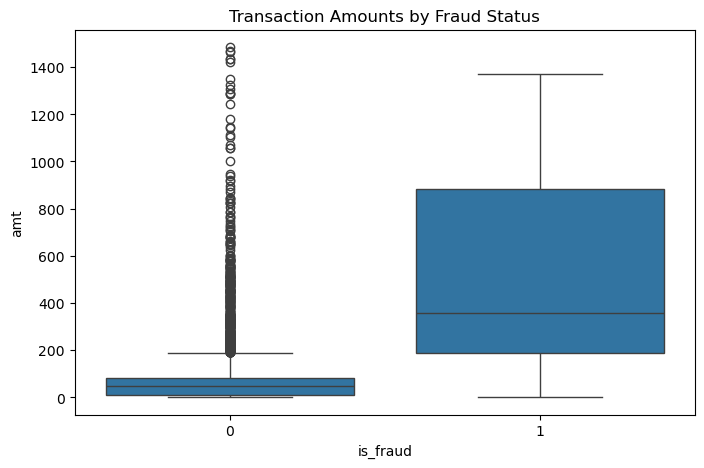

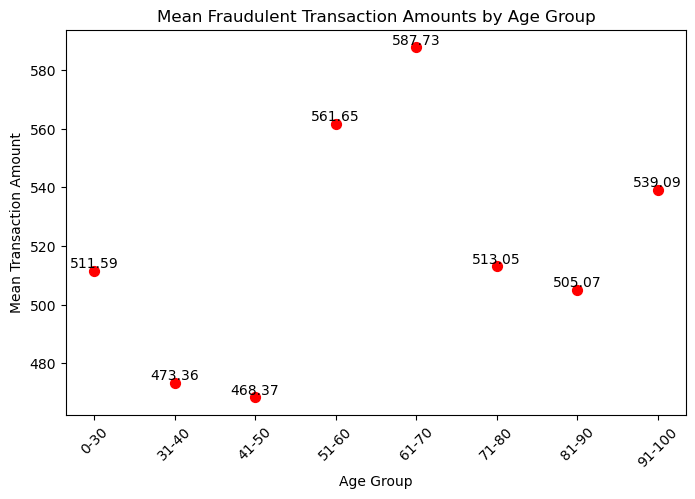

Optimization terminated successfully.
         Current function value: 0.225780
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               is_fraud   No. Observations:                14435
Model:                          Logit   Df Residuals:                    14433
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 Aug 2024   Pseudo R-squ.:                  0.4091
Time:                        20:42:28   Log-Likelihood:                -3259.1
converged:                       True   LL-Null:                       -5515.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.3252      0.045    -73.917      0.000      -3.413      -3.237
amt            0.0077      0.

In [11]:
from datetime import datetime
import statsmodels.api as sm

df_task5 = pd.DataFrame(datadf)

# Convert df_task5['is_fraud'] to int
df_task5['is_fraud'] = df_task5['is_fraud'].astype(int)

# Convert 'trans_date_trans_time' and 'dob' to datetime
df_task5['trans_date_trans_time'] = pd.to_datetime(df_task5['trans_date_trans_time'])
df_task5['dob'] = pd.to_datetime(df_task5['dob'])

# Calculate age and create age groups
df_task5['age'] = df_task5['trans_date_trans_time'].dt.year - df_task5['dob'].dt.year
df_task5['age_group'] = pd.cut(df_task5['age'], bins=[0, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])

# Group by age group to calculate mean fraudulent transaction amounts
age_group_means = df_task5[df_task5['is_fraud'] == 1].groupby('age_group', observed=False)['amt'].mean().reset_index()

# Plotting the box plot for transaction amounts
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_fraud', y='amt', data=df_task5)
plt.title('Transaction Amounts by Fraud Status')
plt.show()

# Plotting the scatter plot for age grouping and mean fraudulent amounts
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age_group', y='amt', data=age_group_means)
plt.title('Mean Fraudulent Transaction Amounts by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Transaction Amount')
plt.xticks(rotation=45,)
# Make the points larger and color them red
plt.scatter(age_group_means['age_group'], age_group_means['amt'], color='red', s=50)
# Show the average amount next to each point
for i in range(len(age_group_means)):
    plt.text(i, age_group_means['amt'][i], round(age_group_means['amt'][i], 2), ha='center', va='bottom')
plt.show()

# Perform a logistic regression analysis

# Assuming 'df' is your DataFrame and it contains 'is_fraud' and 'amt'
df_task5['intercept'] = 1  # Adding an intercept to the model

# Logistic regression model
logit_model = sm.Logit(df_task5['is_fraud'], df_task5[['intercept', 'amt']])
result = logit_model.fit()

# Print the results
print(result.summary())


## Observations

- **Fraud Transaction Behavior:** Fraudulent transactions are generally of higher monetary value, which might indicate that fraudsters target higher-value transactions to maximize their gains.

- **Non-Fraudulent Transactions (is_fraud = 0):**
  The box plot shows that non-fraudulent transactions predominantly have much lower transaction amounts, with most values concentrated near the lower end of the scale. The median is very low compared to fraudulent transactions, and there are very few outliers, indicating that non-fraudulent transactions are generally of a smaller magnitude.

- **Fraudulent Transactions (is_fraud = 1):**
  The fraudulent transactions exhibit a higher range of transaction amounts, with a considerably higher median compared to non-fraudulent transactions. The interquartile range is also larger, and there are numerous outliers indicating some exceptionally high transaction amounts among fraudulent cases. This suggests that when fraud occurs, the transaction amounts tend to be larger.


- **Age-Related Risk:** Middle-aged individuals (particularly in the '61-70' range) appear to be either more susceptible to higher amounts of fraud or are targeted in more costly fraud schemes. This could guide anti-fraud measures and targeted awareness campaigns.

- **Transaction Amount (amt)**: The coefficient for amt is 0.0077 with its p-value < 0.000, indicating that it is highly statistically significant. The standard error is very small, reflecting high confidence in this estimate. The confidence interval for this coefficient is from 0.007 to 0.008, showing a precise estimate. This positive coefficient suggests that higher transaction amounts are associated with an increased likelihood of the transaction being fraudulent.



### Task BONUS: Analyze Relationship between Geopafy API and dataset (Sergei)

  - Using Geopafy API, locate closest police station to dataset merchant location and measure distance. 

  - Create a histogram to display the distribution of distances from merchant locations to the nearest police station. This will provide a straightforward view of how these distances vary across the dataset.

In [ ]:
# Import API key
from api_keys import geoapify_key
import requests

# Create new dataframe storing long and lat of transactions where fraud is detected
fraud_locations = datadf[datadf['is_fraud'] == 1][['merchant','lat', 'long']]

# Add an empty column to store the police station name and distance
fraud_locations['police_station'] = ''
fraud_locations['distance'] = ''

# Set parameters to search for a police station
limit = 1
radius = 5000
params = {
    "apiKey": geoapify_key,
    "limit": limit,
    "radius": radius
}

# Print a message to follow up the police station search
print("Starting Police Station search")

# Iterate through the fraud_locations DataFrame
# iterate through the first 10 rows
for index, row in fraud_locations.iterrows():
    # get latitude, longitude from the DataFrame
    lat = fraud_locations.loc[index, "lat"]
    lng = fraud_locations.loc[index, "long"]

    
    # Add the current transaction's latitude and longitude to the params dictionary
    params["filter"] = f"circle:{lng},{lat},{radius}"
    params["bias"] = f"proximity:{lng},{lat}"
    params["categories"] = "service.police"

    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"

    # Make and API request using the params dictionary
    # Convert the API response to JSON format
    name_address = requests.get(base_url, params=params).json()

    # Grab the first police station from the results and store the name in the hotel_df DataFrame
    try:
        fraud_locations.loc[index, "police_station"] = name_address["features"][0]["properties"]["name"]
        fraud_locations.loc[index, "distance"] = name_address["features"][0]["properties"]["distance"]
        # Convert distance to data type float
        fraud_locations.loc[index, "distance"] = float(fraud_locations.loc[index, "distance"])
        # Convert police station name to data type string
        fraud_locations.loc[index, "police_station"] = str(fraud_locations.loc[index, "police_station"])
    except (KeyError, IndexError):
        # If no police station is found, set the Police Station name as "No stations found".
        fraud_locations.loc[index, "police_station"] = "No Police Station found"

    # Log the search results
    print(f"{fraud_locations.loc[index]} - nearest police station: {fraud_locations.loc[index, 'police_station']}")

    # Narrow down the Merchants to where a police station is within 1km
fraud_locations['distance'] = pd.to_numeric(fraud_locations['distance'], errors='coerce')
police_nearby = fraud_locations[fraud_locations['distance'] <= 5000]

# Print the number of found police stations witthin the full list of fraudulent transactions
print(f'The number of police stations found within 5km of the fraudulent transactions is {len(police_nearby)}')


ModuleNotFoundError: No module named 'api_keys'

In [ ]:
# Print the number of found police stations witthin the full list of fraudulent transactions
print(f'The number of police stations found within 5km of the fraudulent transactions is {len(police_nearby)}')

The number of police stations found within 5km of the fraudulent transactions is 527


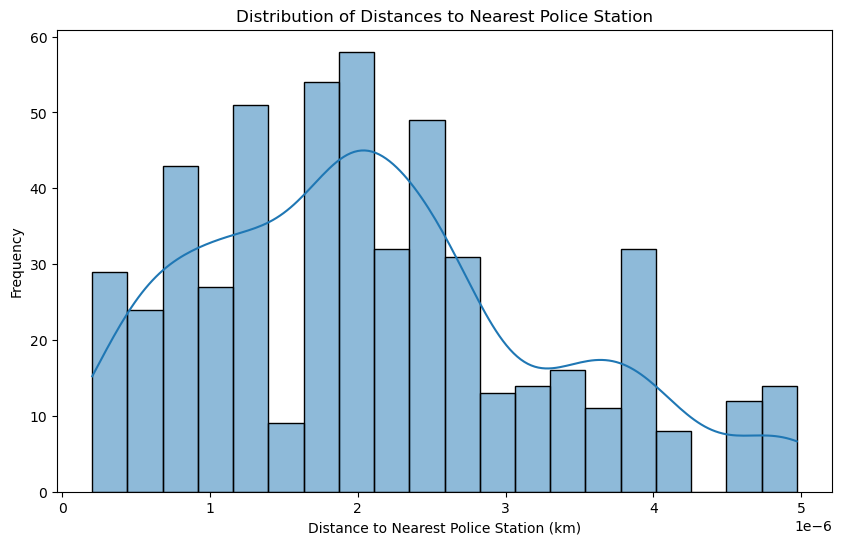

In [ ]:
# Create a histogram to display the distribution of distances from merchant locations to the nearest police station. 
# Covert distance from meters to kilometers
fraud_locations['distance'] = fraud_locations['distance'] / 1000
plt.figure(figsize=(10, 6))
sns.histplot(fraud_locations['distance'], bins=20, kde=True)
plt.title('Distribution of Distances to Nearest Police Station')
plt.xlabel('Distance to Nearest Police Station (km)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Print the number of transactions that happened within 5km of a police station
print(f'The number of transactions that happened within 5km of a police station is {len(police_nearby[police_nearby["distance"] <= 5000])}')

# Print the number of transactions that happened more than 4km from a police station
print(f'The number of transactions that happened more than 5km from a police station is {len(police_nearby[police_nearby["distance"] <= 4000])}')

# Print the number of transactions that happened more than 3km from a police station
print(f'The number of transactions that happened more than 3km from a police station is {len(police_nearby[police_nearby["distance"] <= 3000])}')

# Print the number of transactions that happened more than 2km from a police station
print(f'The number of transactions that happened more than 2km from a police station is {len(police_nearby[police_nearby["distance"] <= 2000])}')

# Print the number of transactions that happened more than 1km from a police station
print(f'The number of transactions that happened more than 1km from a police station is {len(police_nearby[police_nearby["distance"] <= 1000])}')


The number of transactions that happened within 5km of a police station is 527
The number of transactions that happened more than 5km from a police station is 493
The number of transactions that happened more than 3km from a police station is 420
The number of transactions that happened more than 2km from a police station is 246
The number of transactions that happened more than 1km from a police station is 96


### Task 2: Calculate Percentage of Fraudulent Transactions (Kim)

- Calculate the percentage of transactions that are fraudulent by comparing the number of fraudulent transactions to the total number of transactions.

- **Pie Chart:** Use a pie chart to show the proportion of fraudulent versus non-fraudulent transactions. 

- **Bar Chart:** Use a bar chart to show the percentage of fraudulent charges by category in dollars. 

In [12]:
# Update the datadf['is_fraud] to datatype int
datadf['is_fraud'] = datadf['is_fraud'].astype(int)

In [14]:
# Count the number of non fraud transactions
not_fraud_count = (datadf['is_fraud'] == 0).sum()
not_fraud_count

12591

In [15]:
# Count the number of  fraud transactions
fraud_trans_count = (datadf['is_fraud'] == 1).sum()
fraud_trans_count

1844

In [16]:
# Count the total number of transactions
total_fraud = len(datadf)
total_fraud 

14435

In [17]:
# Calculate the percentage of fraud transactions
fraud_percentage = (fraud_trans_count/total_fraud )*100
print(f"The total percentage of fraudulent transactions is {fraud_percentage:.2f}%")

The total percentage of fraudulent transactions is 12.77%


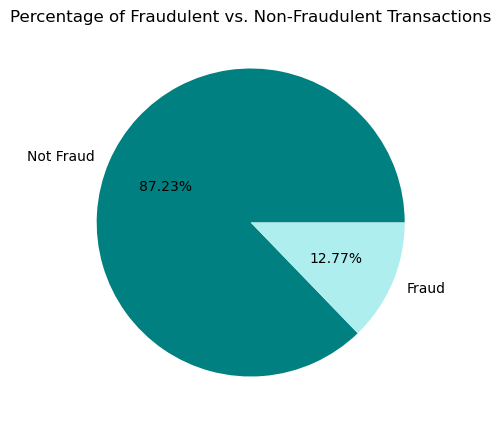

In [46]:
# Create a DataFrame and plot a pie chart
fraud_pie_chart = {'Transaction Type': ['Not Fraud', 'Fraud'], 'Count': [not_fraud_count, fraud_trans_count]}
df = pd.DataFrame(fraud_pie_chart)
plt.figure(figsize=(5, 5))
plt.pie(df['Count'], labels=df['Transaction Type'], autopct='%1.2f%%', colors=['teal', 'paleturquoise'])
plt.title('Percentage of Fraudulent vs. Non-Fraudulent Transactions')

# Save the figure
plt.savefig("Visualizations/PercentageofFraud.png")

plt.show()

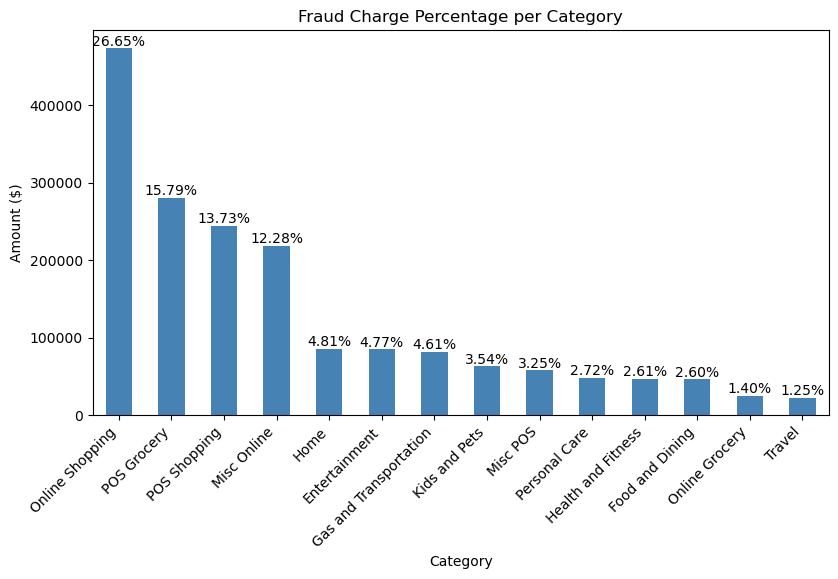

In [59]:
# Clean category names
catrename = {'entertainment': "Entertainment", 
        'food_dining':"Food and Dining", 
        'gas_transport': "Gas and Transportation", 
        'grocery_net': "Online Grocery",
        'grocery_pos': "POS Grocery", 
        'health_fitness': "Health and Fitness", 
        'home': "Home", 
        'kids_pets': "Kids and Pets", 
        'misc_net':"Misc Online",
        'misc_pos': "Misc POS", 
        'personal_care': "Personal Care", 
        'shopping_net' :"Online Shopping", 
        'shopping_pos':"POS Shopping",
        'travel':"Travel"}
datadf['category'] = datadf['category'].replace(catrename)

# Calculate the total charges per category
total_per_category = datadf.groupby("category")["amt"].sum().sort_values(ascending=False)

#Calculate the total charges
total_amt = datadf['amt'].sum()

# Calculate the total of fraudulent charges per category
fraud_percentage_per_category = (total_per_category/total_amt) *100

# Plot the bar chart
fraud_bar_chart = total_per_category.plot(kind="bar", xlabel="Category", ylabel="Amount ($)", figsize=(9.5, 5), color='steelblue')
plt.xticks(rotation=45, ha='right')

# Add percentage labels to each bar
fraud_bar_chart.bar_label(fraud_bar_chart.containers[0], labels=[f'{pct:.2f}%' for pct in fraud_percentage_per_category])

# Save the figure
#plt.savefig("Visualizations/FraudChargePercentage.png")

# Title and show
plt.title('Fraud Charge Percentage per Category')
plt.show()

## Observations

- **Fraud vs. Non-Fraud Percentage** Fraudulent 